In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('KNN_Project_Data', index_col = 0)

In [3]:
df2.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 1636.6706142430207 to 1287.1500253834342
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWYH          1000 non-null   float64
 1   TRAT          1000 non-null   float64
 2   TLLZ          1000 non-null   float64
 3   IGGA          1000 non-null   float64
 4   HYKR          1000 non-null   float64
 5   EDFS          1000 non-null   float64
 6   GUUB          1000 non-null   float64
 7   MGJM          1000 non-null   float64
 8   JHZC          1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [5]:
df2.describe()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [6]:
df2.columns

Index(['GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC',
       'TARGET CLASS'],
      dtype='object')

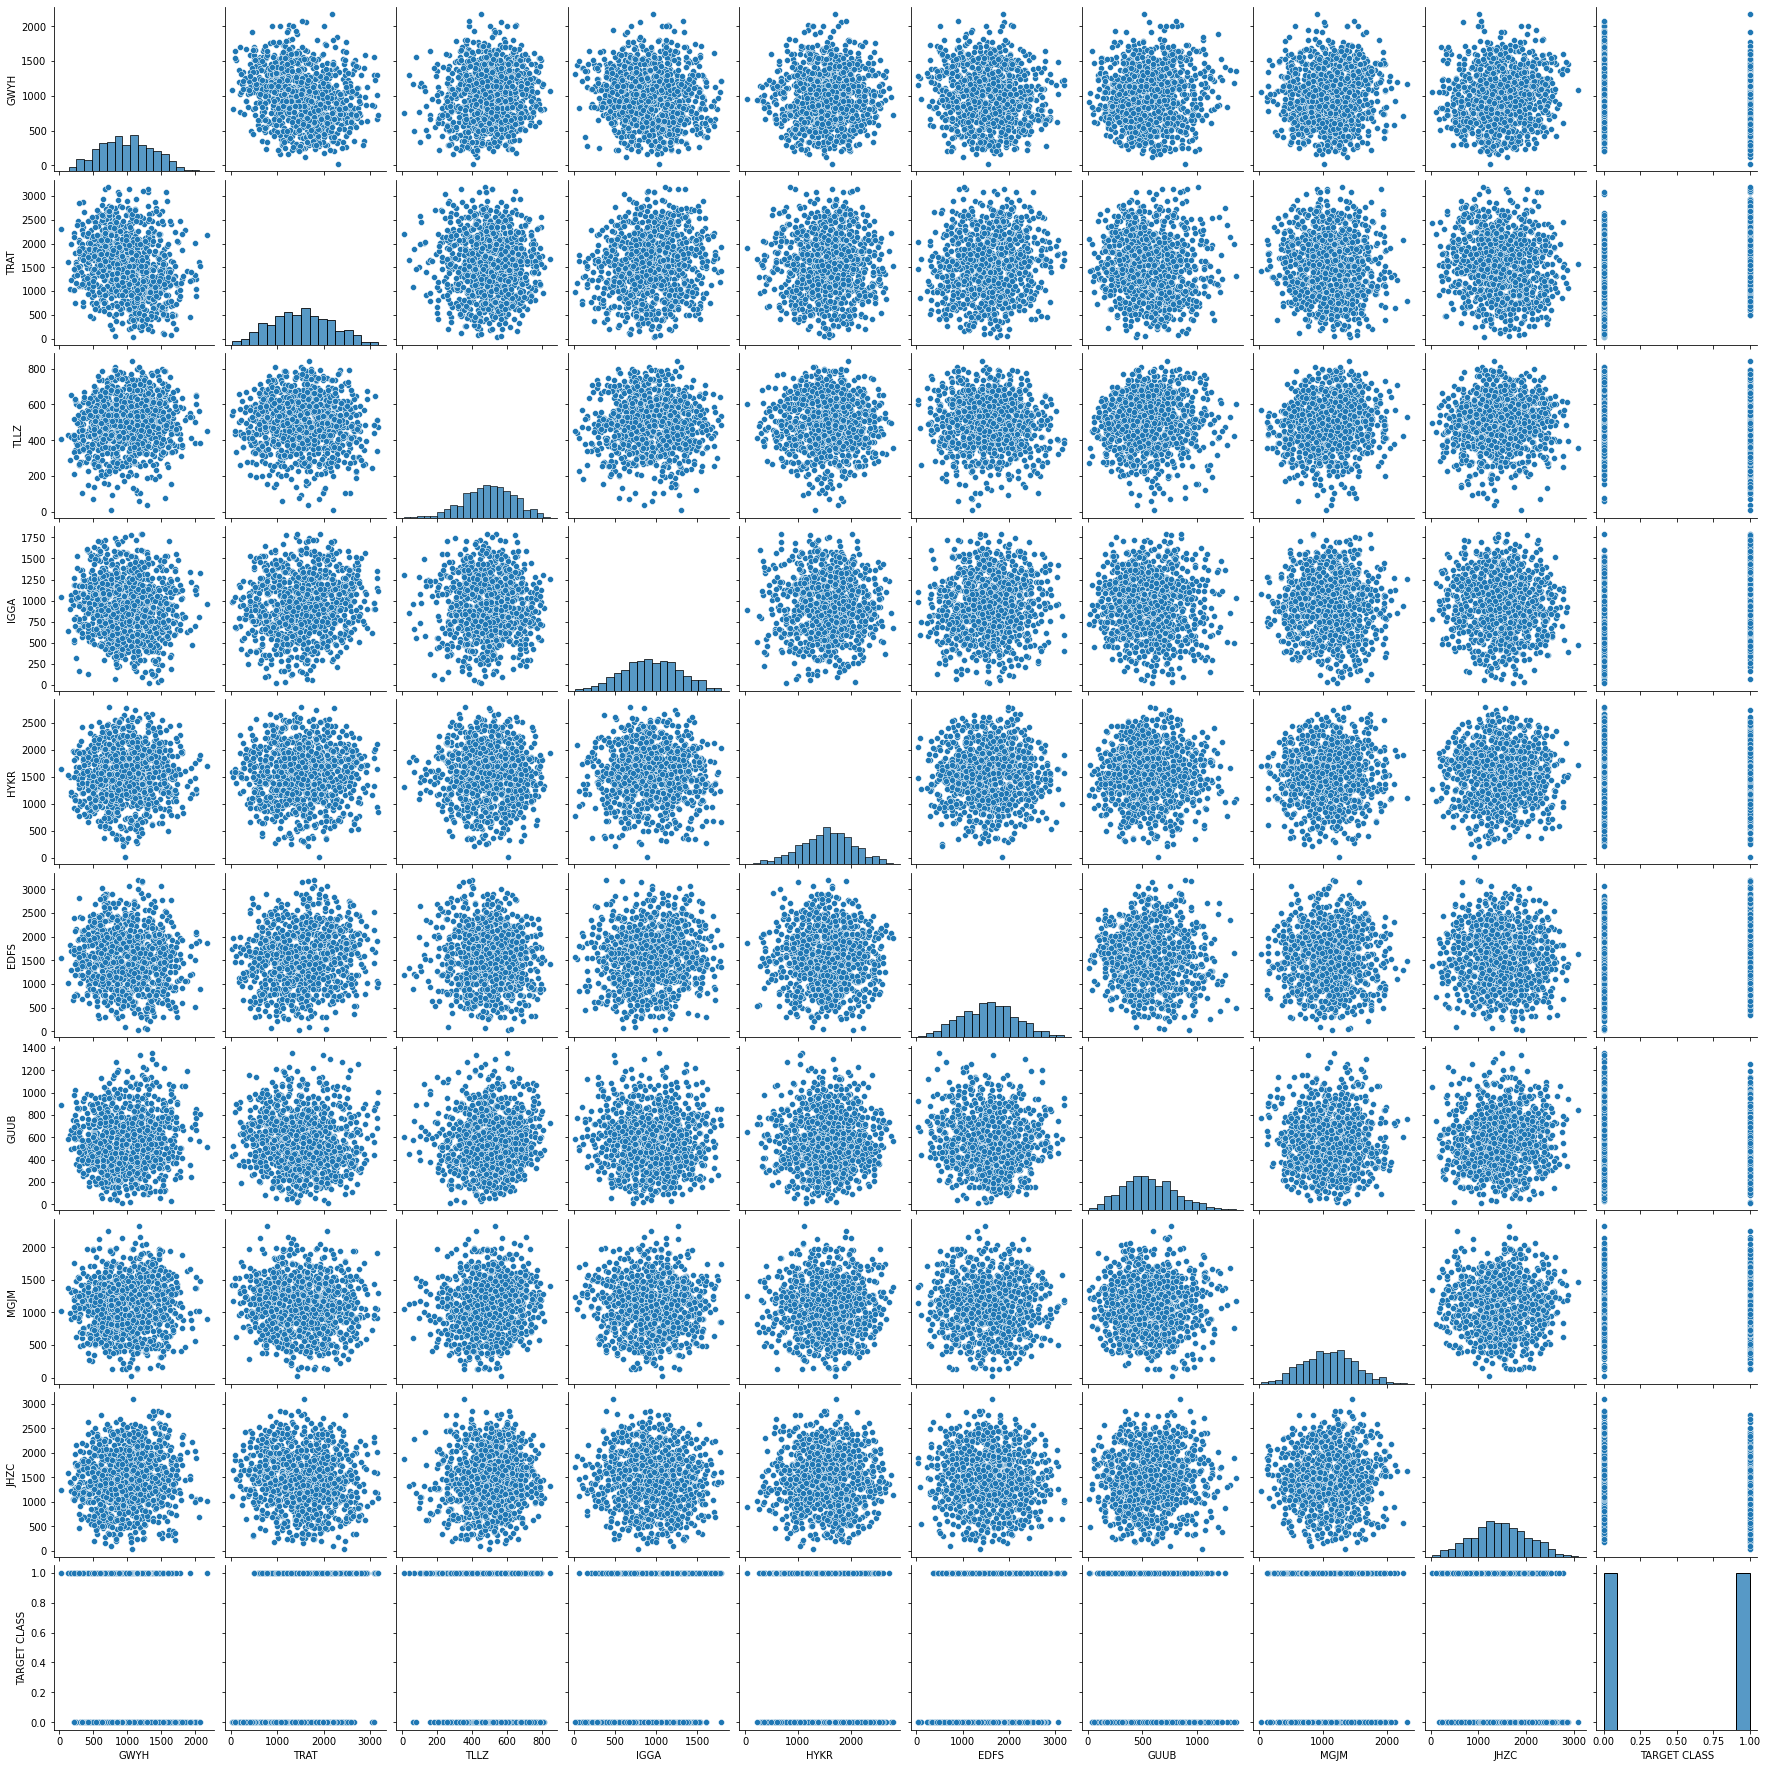

In [7]:
sns.pairplot(df2)

# Now lets Standardize our data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df2.drop('TARGET CLASS', axis = 1))

StandardScaler()

# We need to transform our dataset

In [11]:
scaled_feature = scaler.transform(df2.drop('TARGET CLASS', axis = 1))

In [12]:
scaled_feature

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [13]:
df_feat = pd.DataFrame(scaled_feature, columns = df2.columns[:-1])

In [14]:
df_feat

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...
995,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456
